In [11]:
import pandas as pd

api_key = '6669d7a6eb70f4.27564131'

# be careful with stocks like TSLA doesn't have dividends and will still a top 5 market cap spot, without generating any data
tickers = ['NESN.SW', 'UL.US', 'MDLZ.US', 'CMG.US', 'KHC.US', 'GIS.US', 'HSY.US', 'SYY.US', 'KHC.US']  
#tickers = ['MSFT.US','AAPL.US','AMZN.US','CB.US','INTC.US','AMD.US'] 

# Constants for the number of days before earnings and after dividend
days_after_dividend = 0  # Number of days after the dividend to buy
days_before_earnings = 0  # Number of days before earnings to sell

# Define the period of analysis
start_date = '2019-09-09'
end_date = '2024-09-09'

# Initial nominal investment in each stock
initial_investment = 1000

import food_stock_strategy_simulation as fss

downloaded_data,market_caps = fss.download_data(api_key, tickers, start_date, end_date)



Fetching data for NESN.SW...
<Response [200]>   https://eodhd.com/api/eod/NESN.SW?from=2019-09-09&to=2024-09-09&api_token=6669d7a6eb70f4.27564131&fmt=json
              open    high     low   close  adjusted_close   volume
date                                                               
2019-09-09  112.72  112.98  110.80  110.80         97.1244  6565673
2019-09-10  110.64  110.78  107.86  109.00         95.5465  9625333
2019-09-11  108.32  109.48  107.44  109.48         95.9673  7189545
2019-09-12  109.10  110.48  108.54  109.98         96.4056  5777705
2019-09-13  109.62  109.92  106.26  106.26         93.1447  8120271
...            ...     ...     ...     ...             ...      ...
2024-09-03   91.00   91.72   90.72   91.48         91.4800  4414223
2024-09-04   91.64   91.66   89.46   89.64         89.6400  3714087
2024-09-05   89.30   89.48   88.48   88.48         88.4800  5182973
2024-09-06   88.36   88.94   87.54   87.54         87.5400  5420943
2024-09-09   87.84   88.46  

In [12]:
import pandas as pd

top_stocks_by_date = fss.create_top_stocks_by_date(market_caps, start_date, end_date, 5)

print("------")
print(top_stocks_by_date)

No data for NESN.SW on or before 2019-09-09 00:00:00
No data for UL.US on or before 2019-09-09 00:00:00
No data for MDLZ.US on or before 2019-09-09 00:00:00
No data for CMG.US on or before 2019-09-09 00:00:00
No data for KHC.US on or before 2019-09-09 00:00:00
No data for GIS.US on or before 2019-09-09 00:00:00
No data for HSY.US on or before 2019-09-09 00:00:00
No data for SYY.US on or before 2019-09-09 00:00:00
No stocks have data up to the specified date.
No data for NESN.SW on or before 2019-09-10 00:00:00
No data for UL.US on or before 2019-09-10 00:00:00
No data for MDLZ.US on or before 2019-09-10 00:00:00
No data for CMG.US on or before 2019-09-10 00:00:00
No data for KHC.US on or before 2019-09-10 00:00:00
No data for GIS.US on or before 2019-09-10 00:00:00
No data for HSY.US on or before 2019-09-10 00:00:00
No data for SYY.US on or before 2019-09-10 00:00:00
No stocks have data up to the specified date.
No data for NESN.SW on or before 2019-09-11 00:00:00
No data for UL.US on 

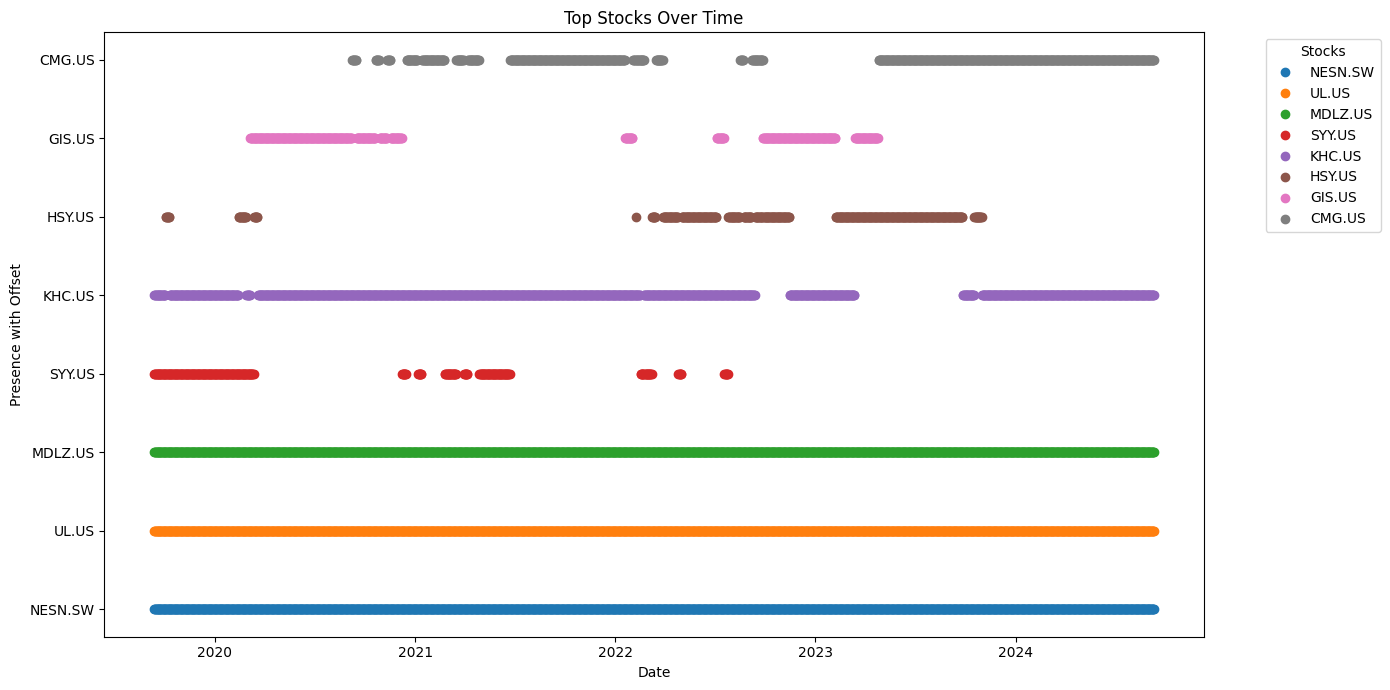

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming top_stocks_by_date is already available as a DataFrame
# Here's an example of how to use it directly:

# "Explode" the DataFrame, which means splitting the lists in each row into separate rows
df = top_stocks_by_date.explode('Stock')

fig, ax = plt.subplots(figsize=(14, 7))

# Get unique stocks and assign each a unique offset on the y-axis
unique_stocks = df['Stock'].unique()
stock_offsets = {stock: i for i, stock in enumerate(unique_stocks, 1)}

for stock in unique_stocks:
    stock_data = df[df['Stock'] == stock]
    # Apply an offset to each stock to separate them vertically, only show markers
    ax.plot(stock_data.index, np.repeat(stock_offsets[stock], len(stock_data)), label=stock, marker='o', linestyle='')

# Formatting the plot
ax.set_title('Top Stocks Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Presence with Offset')
ax.set_yticks(list(stock_offsets.values()))  # Set y-ticks to the assigned offsets
ax.set_yticklabels(list(stock_offsets.keys()))  # Label y-ticks with stock names

# Remove legend from the plot and adjust layout
plt.legend(title='Stocks', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
investment_results = fss.process(downloaded_data, top_stocks_by_date, days_after_dividend, days_before_earnings, initial_investment)


2019-09-27 - Pool 0: Investing $1000.00 in MDLZ.US
2019-10-03 - Pool 1: Investing $1000.00 in SYY.US
2019-10-29 - Pool 0: Sold MDLZ.US - Bought at $49.71, Sold at $47.41, Gain: $-46.22, Total Return: $953.78
2019-10-31 - Pool 0: Investing $953.78 in UL.US
2019-11-04 - Pool 1: Sold SYY.US - Bought at $68.69, Sold at $71.22, Gain: $36.69, Total Return: $1036.69
2019-11-13 - Pool 0: Sold UL.US - Bought at $50.83, Sold at $50.49, Gain: $-6.51, Total Return: $947.28
2019-11-14 - Pool 0: Investing $947.28 in KHC.US
2019-12-30 - Pool 1: Investing $1036.69 in MDLZ.US
2020-01-02 - Pool 2: Investing $1000.00 in SYY.US
2020-01-29 - Pool 1: Sold MDLZ.US - Bought at $49.61, Sold at $49.22, Gain: $-8.29, Total Return: $1028.40
2020-02-03 - Pool 2: Sold SYY.US - Bought at $75.00, Sold at $67.93, Gain: $-94.26, Total Return: $905.74
2020-02-13 - Pool 0: Sold KHC.US - Bought at $24.97, Sold at $22.40, Gain: $-97.61, Total Return: $849.67
2020-02-20 - Pool 0: Investing $849.67 in UL.US
2020-02-20 - Pool

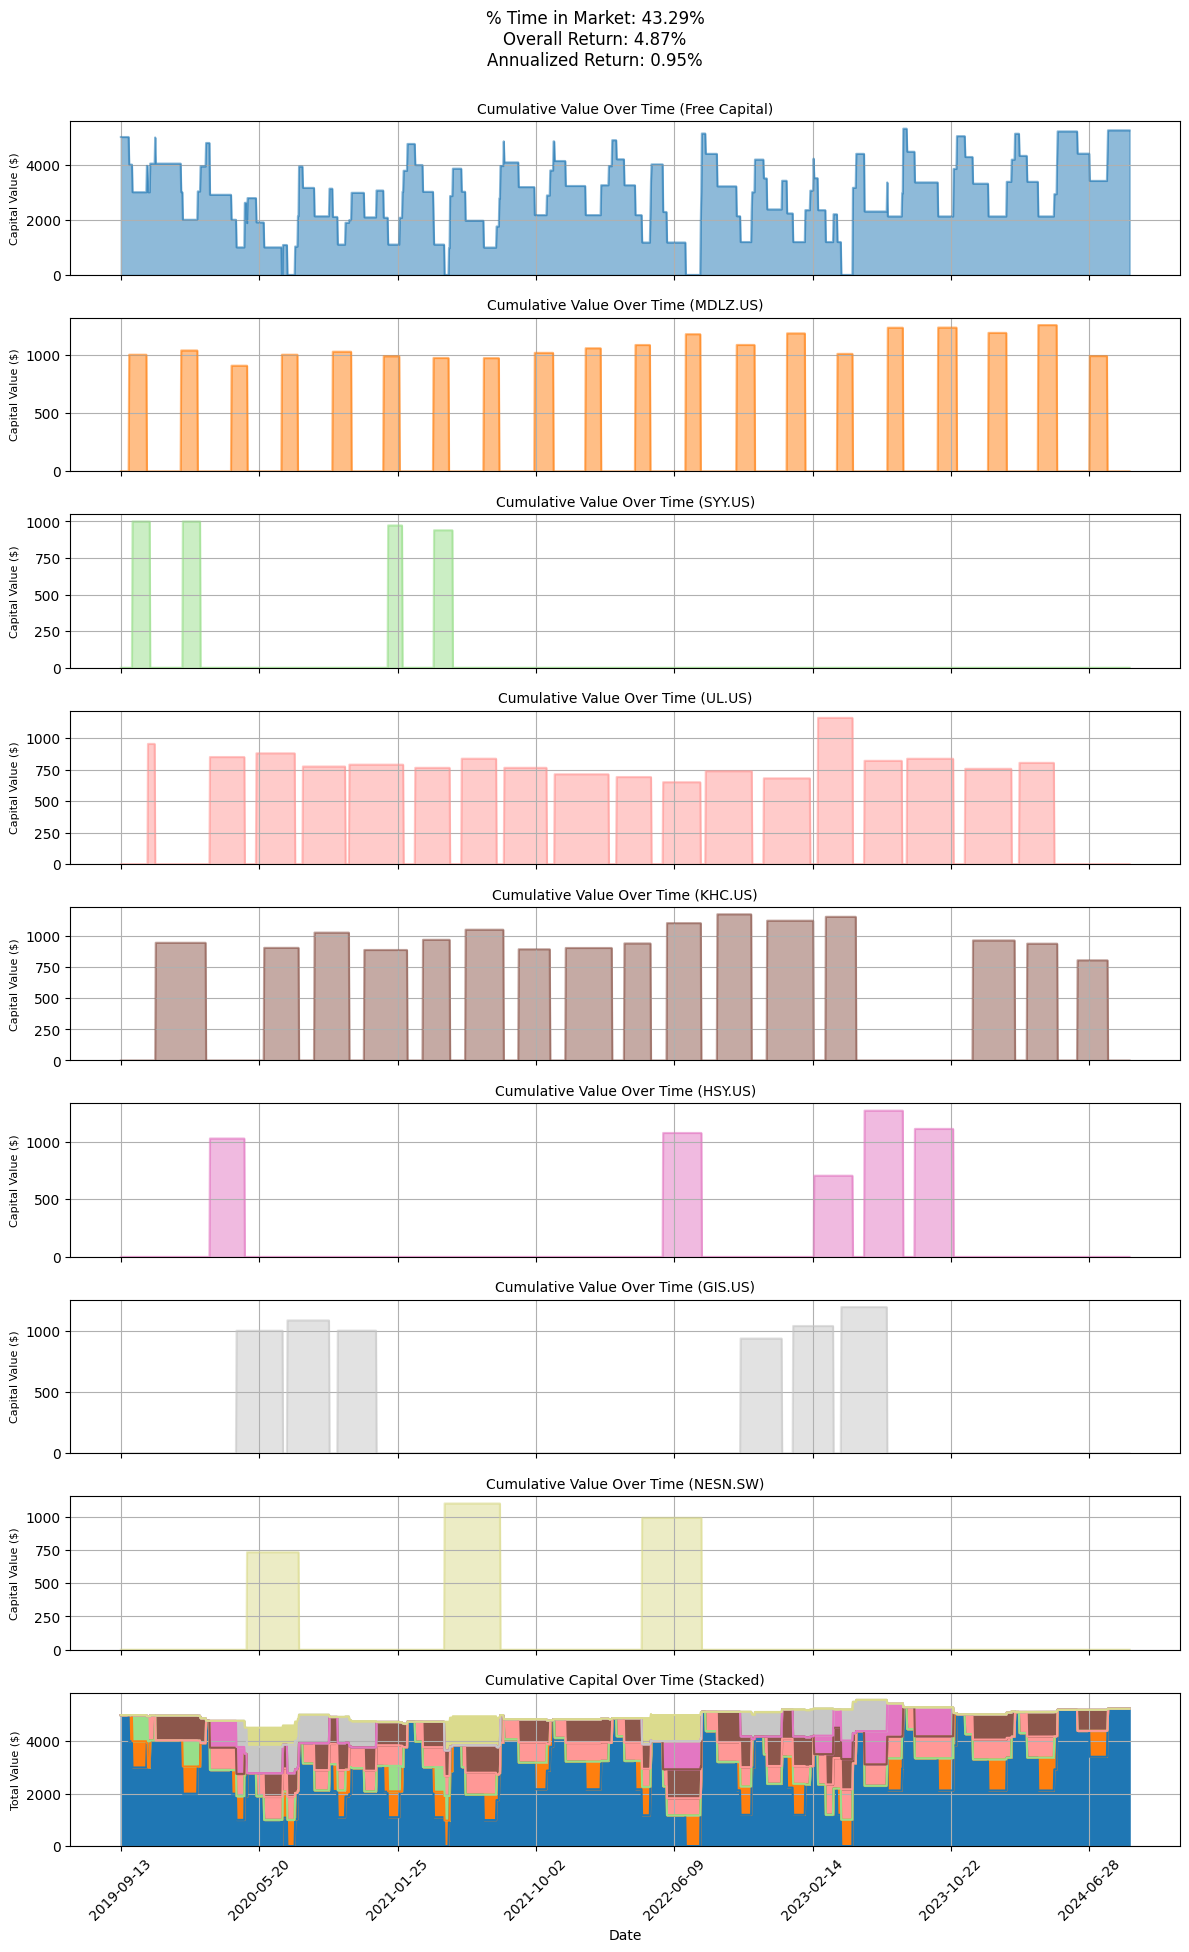

In [15]:


# Assuming investment_results is populated, and start_date and end_date are defined
fss.create_combined_plots(investment_results, start_date, end_date)

plt.show()